In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

fTrace = np.arange(0.1, 20.1, 0.1)
dummy = pd.read_csv('W1.0_0_0.1.csv')
W = np.zeros((dummy.shape[0], fTrace.shape[0]))
n_inputs = 50
t = 1.0
t = str(t)
r = 50
r = str(r)

for f in range(fTrace.shape[0]):
    fName = 'W' + t + '_' + r + '_' + str(round(fTrace[f],2)) +'.csv'
    w = pd.read_csv(fName)
    w = np.array(w).reshape(dummy.shape[0],)
    W[:,f] = w
    print(fName)
        
print('done')


In [15]:
np.savetxt('W50.csv', W, delimiter=',' , fmt =['%f']*fTrace.shape[0], header='', comments='')

(49998, 200)
(49998, 200)
(49998, 200)
(49998, 200)
(49998, 200)
(49998, 200)


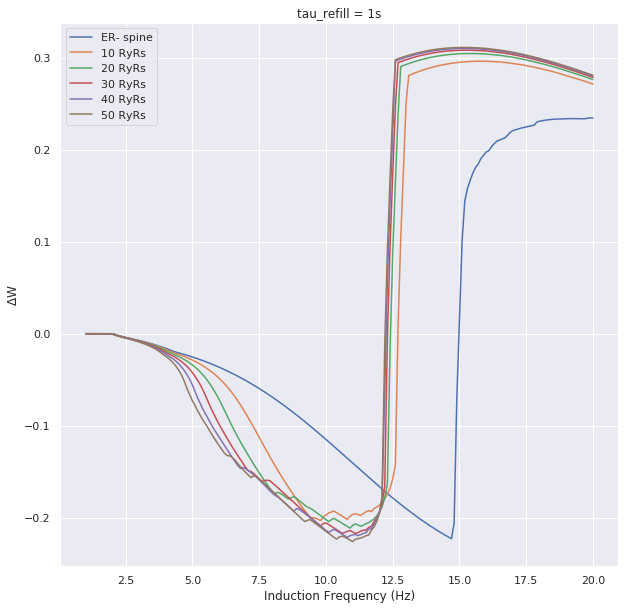

In [32]:
# tmp0 = pd.read_csv('W0.csv')
# tmp10 = pd.read_csv('W10.csv')
# tmp20 = pd.read_csv('W20.csv')
# tmp30 = pd.read_csv('W30.csv')
# tmp40 = pd.read_csv('W40.csv')
# tmp50 = pd.read_csv('W50.csv')

fTrace = np.arange(0.1, 20.1, 0.1)
n_inputs = 50

temp0 = np.array(tmp0)
temp10 = np.array(tmp10)
temp20 = np.array(tmp20)
temp30 = np.array(tmp30)
temp40 = np.array(tmp40)
temp50 = np.array(tmp50)

# ### for steady state calcium, consider the average/max of time response (as required)
# var0 = [np.max(temp0[:,i]) for i in range(fTrace.shape[0])]
# var10 = [np.max(temp10[:,i]) for i in range(fTrace.shape[0])]
# var20 = [np.max(temp20[:,i]) for i in range(fTrace.shape[0])]
# var30 = [np.max(temp30[:,i]) for i in range(fTrace.shape[0])]
# var40 = [np.max(temp40[:,i]) for i in range(fTrace.shape[0])]
# var50 = [np.max(temp50[:,i]) for i in range(fTrace.shape[0])]

var0 = [np.average(temp0[int(n_inputs/fTrace[i] * 1000 - 1000):int(n_inputs/fTrace[i] * 1000 - 10),i]) for i in range(fTrace.shape[0])]   ## x1000  comes due to the choice of timestep, it can be changed
var10 = [np.average(temp10[int(n_inputs/fTrace[i] * 1000 - 1000):int(n_inputs/fTrace[i] * 1000 - 10),i]) for i in range(fTrace.shape[0])]
var20 = [np.average(temp20[int(n_inputs/fTrace[i] * 1000 - 1000):int(n_inputs/fTrace[i] * 1000 - 10),i]) for i in range(fTrace.shape[0])]
var30 = [np.average(temp30[int(n_inputs/fTrace[i] * 1000 - 1000):int(n_inputs/fTrace[i] * 1000 - 10),i]) for i in range(fTrace.shape[0])]
var40 = [np.average(temp40[int(n_inputs/fTrace[i] * 1000 - 1000):int(n_inputs/fTrace[i] * 1000 - 10),i]) for i in range(fTrace.shape[0])]
var50 = [np.average(temp50[int(n_inputs/fTrace[i] * 1000 - 1000):int(n_inputs/fTrace[i] * 1000 - 10),i]) for i in range(fTrace.shape[0])]

##### Max for a given time interval #######
# var0 = [np.max(temp0[int(n_inputs/fTrace[i] * 100 - 1000):,i]) for i in range(fTrace.shape[0])]   ## x1000  comes due to the choice of timestep, it can be changed
# var10 = [np.max(temp10[int(n_inputs/fTrace[i] * 100 - 1000):,i]) for i in range(fTrace.shape[0])]
# var20 = [np.max(temp20[int(n_inputs/fTrace[i] * 100 - 1000):,i]) for i in range(fTrace.shape[0])]
# var30 = [np.max(temp30[int(n_inputs/fTrace[i] * 100 - 1000):,i]) for i in range(fTrace.shape[0])]
# var40 = [np.max(temp40[int(n_inputs/fTrace[i] * 100 - 1000):,i]) for i in range(fTrace.shape[0])]
# var50 = [np.max(temp50[int(n_inputs/fTrace[i] * 100 - 1000):,i]) for i in range(fTrace.shape[0])]

print(temp0.shape)
print(temp10.shape)
print(temp20.shape)
print(temp30.shape)
print(temp40.shape)
print(temp50.shape)

sns.set()
plt.figure(figsize = (10,10))
plt.title('tau_refill = 1s')
plt.plot(fTrace, var0, label = 'ER- spine')
plt.plot(fTrace, var10, label = '10 RyRs')
plt.plot(fTrace, var20, label = '20 RyRs')
plt.plot(fTrace, var30, label = '30 RyRs')
plt.plot(fTrace, var40, label = '40 RyRs')
plt.plot(fTrace, var50, label = '50 RyRs')
plt.xlabel('Induction Frequency (Hz)')
plt.ylabel('$\Delta$W')
plt.legend()
plt.show()

In [35]:
########################## Working Code for RDP - Weight variables #####################################################

#!/usr/bin/env python

import numpy as np
from scipy.integrate import odeint
import pandas as pd
import sys

#### Global constants:
rtol = 1e-6
atol = 1e-6 
F = 96485.33 ## Coulomb/mole
Nav = 6.022e23
e = 2.718
##############################################
#### Prompting the user for input parameters:
 
input_pattern,n_inputs = ['rdp', 50] 
n_RyR, tau_refill, f_input, g_NMDAR = input('n_RyR, tau_refill, f_input,g_NMDAR').split('_')#sys.argv[1].split('_')
n_RyR = int(n_RyR)
tau_refill = float(tau_refill)
f_input = float(f_input)
g_NMDAR = float(g_NMDAR)
##############################################################################################
#### Defining various functions used in model simulation:

##############################################################################################
#### Temporal profile of glutamate availability:

def glu(t,s):
    
    tau_glu = 1e-3 ## sec
    glu_0 = 2.718 * 300 ## uM
        
    if s == 0: 
        return 0
    if s == 1: 
        total = 0
        for tpuff in tpre:    
            if t > tpuff: total += glu_0 * np.exp(-(t-tpuff)/tau_glu) * ((t-tpuff)/tau_glu)
        return total
##############################################################################################

##############################################################################################
#### Voltage profile of BAP at the dendritic compartment:

def u_bpap(t):  ##Use this to get the voltage of the spine whenever required

    V0 = 67
    total = 0
    for tbp in tpost:
        if t > tbp: total += V0 * (0.7 * np.exp(-(t-tbp)/0.003) + 0.3 * np.exp(-(t-tbp)/0.04))
    return E_L + total
##############################################################################################
    
##############################################################################################    
#### AMPAR conductance profile: 

def I_A(s,u,t):

    if s==0:
        return 0
    else:
        total = 0
        for tpuff in tpre:
            if t>tpuff: total += g_A * (np.exp(-(t-tpuff)/tau_A2) - np.exp(-(t-tpuff)/tau_A1))  
        return total * (u - E_A)
##############################################################################################
        
##############################################################################################     
#### NMDAR conductance profile:

def I_N(s,u,t):

    if s==0:
        return 0
    if s==1:
        total = 0
        for tpuff in tpre:
            if t>tpuff: total += g_N * (np.exp(-(t-tpuff)/tau_N2) - np.exp(-(t-tpuff)/tau_N1))
        return total * (u - E_N) / (1 + 0.28 * np.exp(-0.062 * u))
##############################################################################################
        
##############################################################################################        
#### Plasticity model, Omega function

def wfun(x):

    U = -beta2*(x - alpha2)
    V = -beta1*(x - alpha1)
    if U>100: U = 100
    if V>100: V = 100        
    return (1.0/(1 + np.exp(U))) - 0.5*(1.0/(1 + np.exp(V)))
##############################################################################################
    
##############################################################################################    
#### Plasticity model, tau function

def wtau(x):

    return P1 + (P2/(P3 + (2*x/(alpha1+alpha2))**P4))
##############################################################################################
def theta(x):
    if(x > 0):
        return x
    else:
        return 0
#########################################################################################################################       
#### Coupled ODEs describing the ER-bearing spine head, which is resistively coupled to a dendritic compartement via a passive neck:       

def spine_model(x,t):
    
    
    pH, pL, cbp, Bslow, calb, calb_m1, calb_h1, calb_m2, calb_h2, calb_m1h1, calb_m2h1, calb_m1h2, c1n0, c2n0, c0n1, c0n2, c1n1, c2n1, c1n2, c2n2, mv, hv, w, u, ud,\
    ca_er, ca, R, c1, c2, c3, c4, c5, o1, o2 = x
    ###########|----------- RyR ----------| ##############

    nt = glu(t,s)

    if (s>0 and input_pattern=='stdp'): 
        ud = u_bpap(t)
        
    
    
    ca_eq = 0.01 


    
    ## RyR Kinetics:#################################################
    Jrel = gRyR * Vr * (o1 + o2) * (ca_er - ca) 
    ######################### Channel Ca Release ########################################
    ca_eq += n_RyR * Jrel     ## Ca released from RyR also contributes to the cytosolic Ca
    ca_er_eq = - n_RyR * Jrel  +  (ca_er_0 - ca_er)/(tau_refill)   ## Additional Ca depletion due to RyR
########################################################################################################################
    
    ## Buffer equations:

    Bslow_eq = -kslow_f*Bslow*ca + kslow_b*(Bslow_tot - Bslow)
    ca_eq += -kslow_f*Bslow*ca + kslow_b*(Bslow_tot - Bslow)
    
    cbp_eq = -kbuff_f*ca*cbp + kbuff_b*(cbp_tot - cbp)
    ca_eq += -kbuff_f*ca*cbp + kbuff_b*(cbp_tot - cbp)    
    
    calb_m2h2 = calb_tot - calb - calb_m1 - calb_h1 - calb_m2 - calb_h2 - calb_m1h1 - calb_m2h1 - calb_m1h2
    calb_eqs = [ -ca*calb*(km0m1 + kh0h1) + km1m0*calb_m1 + kh1h0*calb_h1,\
                     ca*calb*km0m1 - km1m0*calb_m1 + calb_m2*km2m1 - ca*calb_m1*km1m2 + calb_m1h1*kh1h0 - ca*calb_m1*kh0h1,\
                     ca*calb*kh0h1 - kh1h0*calb_h1 + calb_h2*kh2h1 - ca*calb_h1*kh1h2 + calb_m1h1*km1m0 - ca*calb_h1*km0m1,\
                     ca*calb_m1*km1m2 - km2m1*calb_m2 + kh1h0*calb_m2h1 - ca*kh0h1*calb_m2,\
                     ca*calb_h1*kh1h2 - kh2h1*calb_h2 + km1m0*calb_m1h2 - ca*km0m1*calb_h2,\
                     ca*(calb_h1*km0m1 + calb_m1*kh0h1) - (km1m0+kh1h0)*calb_m1h1 - ca*calb_m1h1*(km1m2+kh1h2) + kh2h1*calb_m1h2 + km2m1*calb_m2h1,\
                     ca*km1m2*calb_m1h1 - km2m1*calb_m2h1 + kh2h1*calb_m2h2 - kh1h2*ca*calb_m2h1 + kh0h1*ca*calb_m2 - kh1h0*calb_m2h1,\
                     ca*kh1h2*calb_m1h1 - kh2h1*calb_m1h2 + km2m1*calb_m2h2 - km1m2*ca*calb_m1h2 + km0m1*ca*calb_h2 - km1m0*calb_m1h2 ]
    ca_eq += -ca*(km0m1*(calb+calb_h1+calb_h2) + kh0h1*(calb+calb_m1+calb_m2) + km1m2*(calb_m1+calb_m1h1+calb_m1h2) + kh1h2*(calb_h1+calb_m1h1+calb_m2h1))+\
                km1m0*(calb_m1+calb_m1h1+calb_m1h2) + kh1h0*(calb_h1+calb_m1h1+calb_m2h1) + km2m1*(calb_m2+calb_m2h1+calb_m2h2) + kh2h1*(calb_h2+calb_m1h2+calb_m2h2)
  
    ## Ca2+/calmodulin kinetics:
    
    c0n0 = cam_tot - c1n0 - c2n0 - c0n1 - c0n2 - c1n1 - c2n1 - c1n2 - c2n2
    c1n0_eq = -(k2c_on*ca + k1c_off + k1n_on*ca)*c1n0 + k1c_on*ca*c0n0 + k2c_off*c2n0 + k1n_off*c1n1
    c2n0_eq = -(k2c_off + k1n_on*ca)*c2n0 + k2c_on*ca*c1n0 + k1n_off*c2n1
    c0n1_eq = -(k2n_on*ca + k1n_off + k1c_on*ca)*c0n1 + k1n_on*ca*c0n0 + k2n_off*c0n2 + k1c_off*c1n1
    c0n2_eq = -(k2n_off + k1c_on*ca)*c0n2 + k2n_on*ca*c0n1 + k1c_off*c1n2
    c1n1_eq = -(k2c_on*ca + k1c_off + k1n_off + k2n_on*ca)*c1n1 + k1c_on*ca*c0n1 + k1n_on*ca*c1n0 + k2c_off*c2n1 + k2n_off*c1n2
    c2n1_eq = -(k2c_off + k2n_on*ca)*c2n1 + k2c_on*ca*c1n1 + k2n_off*c2n2 + k1n_on*ca*c2n0 - k1n_off*c2n1
    c1n2_eq = -(k2n_off + k2c_on*ca)*c1n2 + k2n_on*ca*c1n1 + k2c_off*c2n2 + k1c_on*ca*c0n2 - k1c_off*c1n2
    c2n2_eq = -(k2c_off + k2n_off)*c2n2 + k2c_on*ca*c1n2 + k2n_on*ca*c2n1
    cam_eqs = [c1n0_eq, c2n0_eq, c0n1_eq, c0n2_eq, c1n1_eq, c2n1_eq, c1n2_eq, c2n2_eq]
    ca_eq += -ca*(k1c_on*(c0n0+c0n1+c0n2) + k1n_on*(c0n0+c1n0+c2n0) + k2c_on*(c1n0+c1n1+c1n2) + k2n_on*(c0n1+c1n1+c2n1)) + \
    k1c_off*(c1n0+c1n1+c1n2) + k1n_off*(c0n1+c1n1+c2n1) + k2c_off*(c2n0+c2n1+c2n2) + k2n_off*(c0n2+c1n2+c2n2)
 
    ## PMCA/NCX kinetics:
    
    ca_eq += pH*kH_leak - ca*pH*k1H + k2H*(pHtot - pH)  +  pL*kL_leak - ca*pL*k1L + k2L*(pLtot - pL)
    pH_eq = k3H*(pHtot - pH) - ca*pH*k1H + k2H*(pHtot - pH)
    pL_eq = k3L*(pLtot - pL) - ca*pL*k1L + k2L*(pLtot - pL)
    
    
    ## SERCA kinetics:

    ca_eq += -Vmax_serca * ca**2/(Kd_serca**2 + ca**2) + k_erleak*(ca_er - ca)

    ## VGCC equatiosn:

    mv_eq = ((1.0/(1 + np.exp(-(u-um)/kmv))) - mv)/tau_mv
    hv_eq = ((1.0/(1 + np.exp(-(u-uh)/khv))) - hv)/tau_hv
    I_vgcc = -0.001 * Nav * 3.2e-19 * g_vgcc * (mv**2) * hv * 0.078 * u * (ca - ca_ext*np.exp(-0.078*u))/(1 - np.exp(-0.078*u))
    
    ## Spine and dendrite voltage eqns:
  

    sp_hh_eq = -(1/Cmem) * ( g_L*(u - E_L) + I_A(s,u,t)/Aspine + I_N(s,u,t)/Aspine - (gc/Aspine)*(ud - u) - I_vgcc/Aspine)
    dend_hh_eq = -(1/Cmem) * ( g_L*(ud - E_L) + rho_spines*gc*(ud - u))

    ## Ca2+ influx through NMDAR and VGCC:
    #print(g_N, n_RyR)
    ca_eq += -(g_N_Ca/Vspine) * (I_N(s,u,t)/(g_N*(u - E_N))) * 0.078 * u * (ca - ca_ext*np.exp(-0.078*u))/(1 - np.exp(-0.078*u)) \
            -(g_vgcc/Vspine) * (mv**2) * hv * 0.078 * u * (ca - ca_ext*np.exp(-0.078*u))/(1 - np.exp(-0.078*u))   
    
    ################################## RyR Dynamics #################################################
    dRdt  = -R*ca*kRc1 + c1*kc1R
    dc1dt = -(kc1c2*ca+ kc1R)*c1 + c2*kc2c1 + kRc1*ca*R
    dc2dt = -(kc2c3*ca + kc2c1)*c2 + kc3c2*c3 + kc1c2*ca*c1
    dc3dt = -(kc3c4*ca + kc3c2)*c3 + kc2c3*ca*c2 + kc4c3*c4
    dc4dt = -(kc4o1 + kc4o2 + kc4c3)*c4 + kc3c4*ca*c3 + ko1c4*o1 + ko2c4*o2
    dc5dt = -(kc5o1 + kc5o2 + kc5I)*c5 + ko1c5*o1 + kIc5*(1-R-c1-c2-c3-c4-c5-o1-o2) + ko2c5*o2
    do1dt = -(ko1c5 + ko1c4)*o1 + kc4o1*c4 + kc5o1*c5
    do2dt = -(ko2c4 + ko2c5)*o2 + kc4o2*c4 + kc5o2*c5
    ##################################################################################################
    ## Equation for plasticity variable w:
    acam = cam_tot - c0n0    
    w_eq = (1.0/wtau(acam))*(wfun(acam) - w)
    
    

    return [pH_eq, pL_eq, cbp_eq, Bslow_eq] + calb_eqs + cam_eqs + [mv_eq, hv_eq] + [w_eq] + [sp_hh_eq, dend_hh_eq,\
            ca_er_eq, ca_eq] + [dRdt, dc1dt, dc2dt, dc3dt, dc4dt, dc5dt, do1dt, do2dt]
##############################################################################################################################################################


##############################################
#### Setting model parameters:
##############################################
## Spine compartment and ER size:
Vspine = 0.06 ## um^3
d_spine = (6*Vspine/3.14)**0.333  ## um
Aspine = 3.14 * d_spine**2 * 1e-8  ## cm^2
Vspine = Vspine * 1e-15 ## liter
Aer = 0.1 * Aspine  ## cm^2
Ver = 0.1 * Vspine  ## liter
Vspine = Vspine-Ver  ## liter

 


## Parameters for endogenous immobile buffer (CBP): 
kbuff_f = 247 ## /uM/s
kbuff_b = 524 ## /s

## Parameters for endogenous slow buffer:
kslow_f = 24.7 ## /uM/s
kslow_b = 52.4 ## /s

## Parameters for calbindin-Ca2+ kinetics:
km0m1=174 ## /uM/s
km1m2=87 ## /uM/s
km1m0=35.8 ## /s
km2m1=71.6 ## /s
kh0h1=22 ## /uM/s
kh1h2=11 ## /uM/s
kh1h0=2.6 ## /s
kh2h1=5.2 ## /s

## Parameters for PMCA and NCX pumps:
k1H,k2H,k3H,kH_leak = [150,15,12,3.33]  ## (/uM/s, /s, /s, /s)
k1L,k2L,k3L,kL_leak = [300,300,600,10]  ## (/uM/s, /s, /s, /s)

## Parameters for CaM-Ca2+ interaction:
k1c_on = 6.8  ## /uM/s
k1c_off = 68  ## /s
k2c_on = 6.8 ## /uM/s
k2c_off = 10 ## /s
k1n_on = 108 ## /uM/s
k1n_off = 4150 ## /s
k2n_on = 108 ## /uM/s
k2n_off = 800 ## /s

## Membrane and leak parameters:
Cmem = 1e-6 ##  F/cm^2
g_L = 2e-4  ## S/cm^2
E_L = -70   ## mV

## AMPA receptor parameters:
tau_A1 = 0.2e-3 ## s
tau_A2 = 2e-3  ## s
E_A = 0  ## mV
g_A = 0.5e-9  ## S

## NMDA receptor parameters:
tau_N1 = 5e-3 ## s
tau_N2 = 50e-3 ## s
E_N = 0  ## mV
g_N = float(g_NMDAR) * 1e-12  ## S

## L-VGCC parameters:
um = -20 ## mV
kmv = 5  ## mV
tau_mv = 0.08e-3 ## sec
uh = -65  ## mV
khv = -7 ## mV			 
tau_hv = 300e-3  ## sec

## Spine neck parameters:
Rneck = 1e8  ## Ohm
gc = 1.0/Rneck ## S
rho_spines = 0  ## Surface density of co-active synaptic inputs on dendritic compartment (cm^-2)

## SERCA kinetic parameters:
Vmax_serca = 1  ## uM/sec
Kd_serca = 0.2 ## uM

## Parameters for Ca2+-based plasticity model:
P1,P2,P3,P4 = [1.0,10.0,0.001,2]
beta1,beta2 = [60,60]  ## /uM
alpha1,alpha2 = [2.18,31.69] ## uM



####################### Ryanodine Receptor Model ############################
###################### Based on paper by Dura et al. (2002) #################
##### The model consists of a gating scheme consisting of 5 closed states and 2 open states ####

#################### Rate Constants ###################################
kon = 712.0 #1/(uM.s)
koff = 3000.0 #### units of all the quantities hereafter is s^-1 ######
kc4o1 = 10000.0 
kc4o2 = 1
ko1c4 = 500
ko2c4 = 0.5
ko1c5 = 2.0
ko2c5 = 3000.0
kc5o1 = 0.6666
kc5o2 = 100.0
kc5I  = 0.5
kIc5 = 1.5
kRc1 = 4*kon
kc1R = koff
kc1c2 = 3*kon
kc2c1 = 2*koff
kc2c3 = 2*kon
kc3c2 = 3*koff
kc3c4 = kon
kc4c3 = 4*koff


#########################################################
########### Concentrations of various species ###########
#########################################################

## External Ca (uM):
ca_ext = 2e3

## Resting cytosolic Ca (uM):ip3
ca_0 = 0.05

## Resting Ca in ER (uM):
ca_er_0 = 250 #100 

## Total calbindin concentration in spine (uM):
calb_tot = 45

## Total CBP concentration in the spine (uM):
cbp_tot = 80

## Total slow buffer concentration in the spine (uM):
Bslow_tot = 40

## Total concentration of PMCA and NCX pumps in the spine head (uM):
pHtot = (1e14) * 1000 * Aspine/(Nav * Vspine)
pLtot = (1e14) * 140 * Aspine/(Nav * Vspine)

## Total concentration of CaM in spine (uM):
cam_tot = 50


#########################################################################################



###########################################################################################################
#### Start of simulations
#########################################################

################ RyR ########################################
#### The model consists of a gating scheme consisting of 5 closed states and 2 open states ####
#################### Rate Constants ###################################
kon = 712.0 #1/(uM.s)
koff = 3000.0 #### units of all the quantities hereafter is s^-1 ######
kc4o1 = 10000.0 
kc4o2 = 1
ko1c4 = 500
ko2c4 = 0.5
ko1c5 = 2.0
ko2c5 = 3000.0
kc5o1 = 0.6666
kc5o2 = 100.0
kc5I  = 0.5
kIc5 = 1.5
kRc1 = 4*kon
kc1R = koff
kc1c2 = 3*kon
kc2c1 = 2*koff
kc2c3 = 2*kon
kc3c2 = 3*koff
kc3c4 = kon
kc4c3 = 4*koff
##########################################################
######## RyR parameters (play around these to make sure everyting works well together) ##########
gRyR = 10 #s^-1  ## Johenning's data -> see analysis
Vr = 0.185 #volume ratio of RyR to spine


##########################################################################################################
######################## Initializing all variables:######################################################
########################################################################################################


pumps_init = [pHtot, pLtot]
buff_init =  [cbp_tot, Bslow_tot] + [calb_tot,0,0,0,0,0,0,0] 
CaM_init = [0]*8  
vgcc_init = [0,1] 
w_init = [0] 
voltage_init = [E_L, E_L]

ca_init = [ca_er_0, ca_0]
RyR_init = [1/8]*8
     
xinit0 = pumps_init + buff_init + CaM_init + vgcc_init + w_init + voltage_init + ca_init + RyR_init

g_N_Ca = 0.1 * (g_N/(2*F*78.0*ca_ext)) * 1e6   ## Ca conductance of NMDAR channels; liter/sec
if input_pattern == 'rdp': g_vgcc = 0  ## VGCC ignored for presynaptic-only inputs
else: g_vgcc = g_N_Ca
k_erleak = Vmax_serca * (ca_0**2)/((Kd_serca**2 + ca_0**2)*(ca_er_0 - ca_0))  ## /s

###################################################################################################################
 
########################################################################################################
#### Running the ER+ spine model in the absence of inputs to converge to steady state (resting state): 
########################################################################################################
  
s = 0      

t0 = np.arange(0,100,0.01)

sol = odeint(spine_model,xinit0,t0,atol=atol,rtol=rtol)



########################################################################################################

###################################################################################
#### Integrating the ER+ spine model in the presence of user-defined input pattern:
###################################################################################
fTrace = np.arange(0.1, 20.1, 1e0)

s = 1
t = np.arange(0., 50. ,1e-3)
weights = np.zeros(t.shape[0])
xinit = sol[-1,:]
############################################### RDP Protocol ####################################

tpre = [i/float(f_input) for i in range(int(float(n_inputs)))] 
if n_RyR == 0:
    Vmax_serca = 0
    k_erleak = 0
    sol = odeint(spine_model, xinit, t, atol=atol,rtol=rtol)
    weights[:] = sol[:,-13]  ##-13 for weight variable
else:
    sol = odeint(spine_model, xinit, t, atol=atol,rtol=rtol)
    weights[:] = sol[:,-13]



########################################################################################################

############################# saving into file #######################################################

fName = '/storage/vikrant/overall_plas/Wgt' + str(tau_refill) + '_' + str(n_RyR) + '_' + str(g_NMDAR)+ '_' + str(f_input) + '.csv'

np.savetxt(fName, weights, fmt = ['%f'], delimiter = ',', header = '', comments = '')



n_RyR, tau_refill, f_input,g_NMDAR 40_10_10.5_120


In [36]:
n_RyR = np.arange(10, 61, 10)#param1 = []
tau_refill = np.array((1e-6, 1e-3, 1e-1, 1e0, 1e1))#param2 = []
f_input = np.arange(0.1, 20.1, 0.1)
g_NMDAR = np.array((40.0, 80.0, 120.0, 160.0, 200.0))
t = 10 

params = []
for r in n_RyR:
	for f in f_input:
		for g in g_NMDAR:
			params.append(str(r)+'_'+str(t)+'_'+str(f)+'_'+str(g))
            
print(params)

['10_10_0.1_40.0', '10_10_0.1_80.0', '10_10_0.1_120.0', '10_10_0.1_160.0', '10_10_0.1_200.0', '10_10_0.2_40.0', '10_10_0.2_80.0', '10_10_0.2_120.0', '10_10_0.2_160.0', '10_10_0.2_200.0', '10_10_0.30000000000000004_40.0', '10_10_0.30000000000000004_80.0', '10_10_0.30000000000000004_120.0', '10_10_0.30000000000000004_160.0', '10_10_0.30000000000000004_200.0', '10_10_0.4_40.0', '10_10_0.4_80.0', '10_10_0.4_120.0', '10_10_0.4_160.0', '10_10_0.4_200.0', '10_10_0.5_40.0', '10_10_0.5_80.0', '10_10_0.5_120.0', '10_10_0.5_160.0', '10_10_0.5_200.0', '10_10_0.6_40.0', '10_10_0.6_80.0', '10_10_0.6_120.0', '10_10_0.6_160.0', '10_10_0.6_200.0', '10_10_0.7000000000000001_40.0', '10_10_0.7000000000000001_80.0', '10_10_0.7000000000000001_120.0', '10_10_0.7000000000000001_160.0', '10_10_0.7000000000000001_200.0', '10_10_0.8_40.0', '10_10_0.8_80.0', '10_10_0.8_120.0', '10_10_0.8_160.0', '10_10_0.8_200.0', '10_10_0.9_40.0', '10_10_0.9_80.0', '10_10_0.9_120.0', '10_10_0.9_160.0', '10_10_0.9_200.0', '10_10_